#                                          Insights From Textual Data

# Importing Libraries and Reading Data

## Importing necessary libraries

In [122]:
# Importing the pandas library and aliasing it as 'pd'
import pandas as pd

## Reading the dataset into a Pandas DataFrame

In [123]:
# Defining the file path for the dataset
file = "/Users/dileepkumarkatla/Downloads/netflix_titles.csv"

# Reading the CSV file into a Pandas DataFrame
df = pd.read_csv(file)

# Displaying the first 20 rows of the DataFrame
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

# Exploratory Data Analysis (EDA)

## Displaying basic information about the DataFrame such as the first few rows,random sample 

In [124]:
# Displaying a random sample of 20% of the DataFrame
print(df.sample(frac=0.2))

     show_id     type                                        title  \
2855   s2856  TV Show                               Babylon Berlin   
6289   s6290    Movie                                      Bewafaa   
3088   s3089  TV Show  The Disastrous Life of Saiki K.: Reawakened   
1507   s1508    Movie         Shaun the Sheep: The Farmer’s Llamas   
4875   s4876    Movie                                         Anon   
...      ...      ...                                          ...   
7444   s7445    Movie                                      Menorca   
517     s518  TV Show                            Good Morning Call   
3192   s3193  TV Show                                   Eastsiders   
8695   s8696    Movie                            War Chhod Na Yaar   
6654   s6655    Movie                                          Dum   

              director                                               cast  \
2855               NaN  Volker Bruch, Liv Lisa Fries, Peter Kurth, Leo...   
6289 

## Column Names

In [125]:
# Displaying the column names of the DataFrame
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


## Data Types

In [126]:
# Displaying the data types of each column in the DataFrame
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


## Info

In [127]:
# Displaying information about the DataFrame, including non-null counts and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


## Descriptive Statistics

In [128]:
# Displaying descriptive statistics for numerical columns in the DataFrame
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


# Feature Engineering

## Adding a new column 'length'

In [129]:
# Adding a new column 'length' to the DataFrame, representing the length of the 'description' column
df['length'] = df['description'].str.len()

# Displaying descriptive statistics for the DataFrame with the new 'length' column
print(df.describe())

       release_year       length
count   8807.000000  8807.000000
mean    2014.180198   143.303281
std        8.819312    10.334959
min     1925.000000    61.000000
25%     2013.000000   140.000000
50%     2017.000000   146.000000
75%     2019.000000   149.000000
max     2021.000000   248.000000


## Handling missing values

In [130]:
# Filling NaN values in the 'cast' and 'country' columns with 'unknown'
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)

# Confirming that missing values have been successfully handled
print(df.isna().sum())

show_id            0
type               0
title              0
director        2634
cast               0
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
length             0
dtype: int64


## Converting text data to uppercase

In [131]:
# Converting text data to uppercase in specific columns ('type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description')
df['type'] = df['type'].str.upper()
df['title'] = df['title'].str.upper()
df['director'] = df['director'].str.upper()
df['cast'] = df['cast'].str.upper()
df['country'] = df['country'].str.upper()
df['rating'] = df['rating'].str.upper()
df['listed_in'] = df['listed_in'].str.upper()
df['description'] = df['description'].str.upper()

# Filling NaN values in the 'director' column with 'unknown'
df['director'].fillna('unknown', inplace=True)

# Printing data with 'director' named 'steve'
print(df[df['director'].str.contains('STEVE')])

     show_id   type                                         title  \
41       s42  MOVIE                                          JAWS   
141     s142  MOVIE                                    EXTRACTION   
264     s265  MOVIE                                 WALK OF SHAME   
279     s280  MOVIE          MONSTER HUNTER: LEGENDS OF THE GUILD   
329     s330  MOVIE                           CATCH ME IF YOU CAN   
...      ...    ...                                           ...   
8362   s8363  MOVIE                                THE INFORMANT!   
8483   s8484  MOVIE                                    THE REZORT   
8520   s8521  MOVIE                                   THE STUDENT   
8594   s8595  MOVIE  TINKER BELL AND THE LEGEND OF THE NEVERBEAST   
8696   s8697  MOVIE                                     WAR HORSE   

               director                                               cast  \
41     STEVEN SPIELBERG  ROY SCHEIDER, ROBERT SHAW, RICHARD DREYFUSS, L...   
141    STEVEN C

# Data Visualization

## Line Plot

<Axes: title={'center': 'Distribution of Description Lengths'}, xlabel='Index', ylabel='Description Length'>

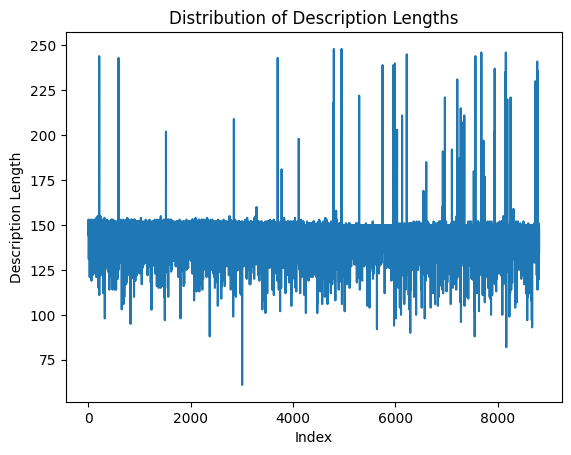

In [132]:
# Plotting the length of descriptions
df['length'].plot(title='Distribution of Description Lengths', xlabel='Index', ylabel='Description Length')

## Histogram

<Axes: title={'center': 'Histogram of Description Lengths'}, xlabel='Description Length', ylabel='Frequency'>

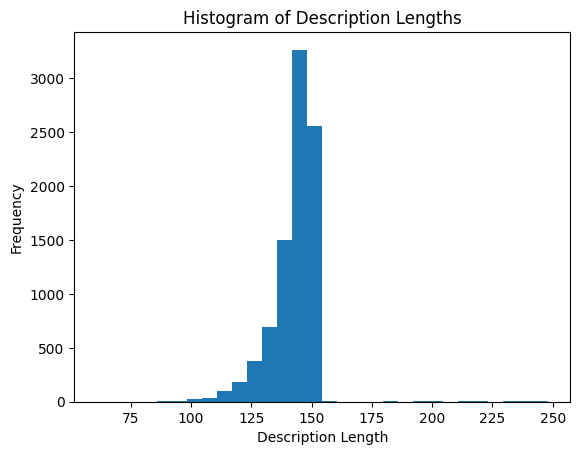

In [133]:
# Creating a histogram of description lengths in the DataFrame
df['length'].plot(kind='hist', bins=30, title='Histogram of Description Lengths', xlabel='Description Length', ylabel='Frequency')

## Box Plot

<Axes: title={'center': 'Box Plot of Description Lengths'}, xlabel='Description Length'>

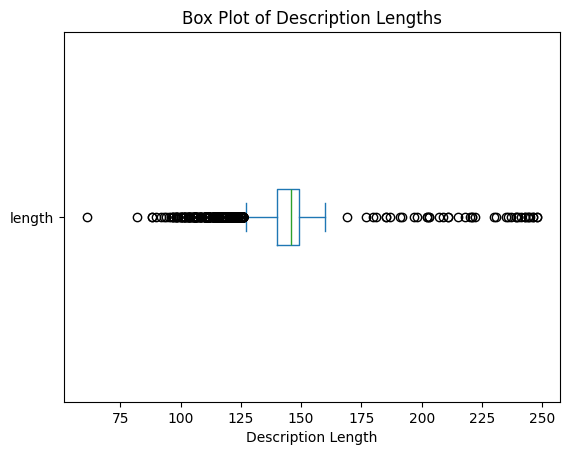

In [134]:
# Plotting the distribution of description lengths using a box plot
df['length'].plot(kind='box', vert=False, title='Box Plot of Description Lengths', xlabel='Description Length')

## Filtering data for specific countries

## Generating visualizations such as a histogram and box plot for description lengths

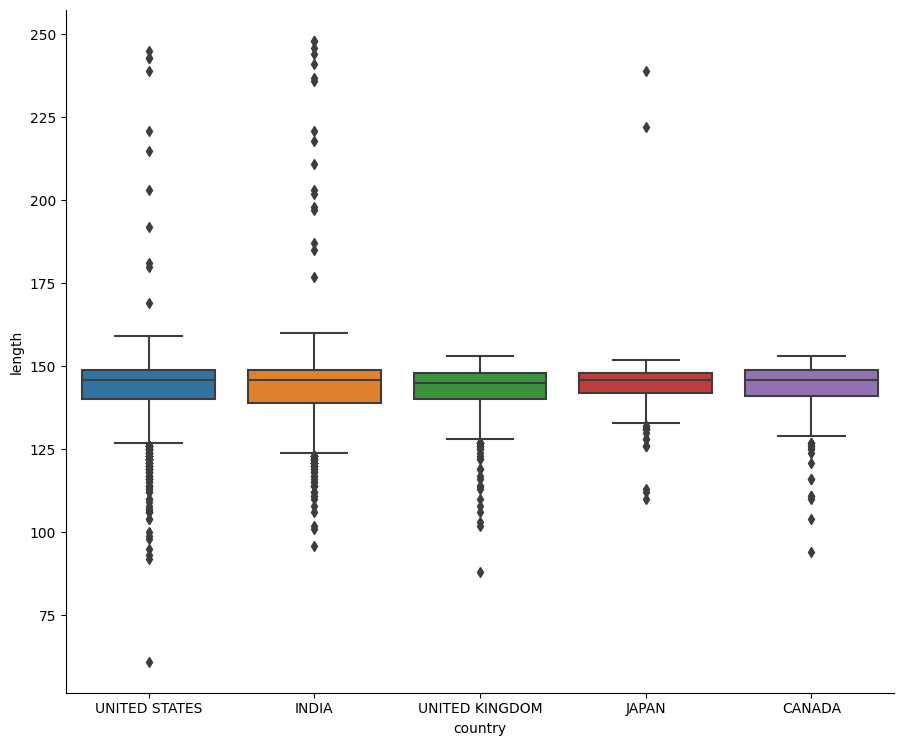

In [135]:
# Importing seaborn for visualization
import seaborn as sns

# Filtering data for specific countries and plotting description length distribution using a box plot
where = df['country'].isin(['UNITED STATES', 'UNITED KINGDOM', 'CANADA', 'INDIA', 'JAPAN'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(10, 8)

# Text Preprocessing

## Tokenizing 

In [136]:
# Tokenizing the text in the 'description' column using a custom function 'tokenize'
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

# Testing the tokenize function on a sample text
testtext = "In a post-apocalyptic world, humans and robots coexist."
testtokens = tokenize(testtext)
print(testtokens)

['In', 'a', 'post-apocalyptic', 'world', 'humans', 'and', 'robots', 'coexist']


## Removing stopwords

In [137]:
# Importing NLTK and creating a set of English stopwords
import nltk
from nltk.corpus import stopwords

# Setting up the stopwords for English
stop_words = set(stopwords.words('english'))

# Displaying the set of stopwords
print(stop_words)


# Removing stopwords from tokens
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stop_words]  

# Testing the remove_stop function
cleantokens = remove_stop(testtokens)
print(cleantokens)

{'am', 'up', "should've", 'what', 'theirs', 'not', 'itself', 'into', 'mightn', 'does', 'or', 'hadn', 'just', 'through', 'should', 'himself', 'such', 'be', 'an', 't', 'how', 'until', 'myself', 'by', 'about', 'his', "it's", "you'll", 'over', "don't", 'which', "wouldn't", 'the', 'aren', 'ourselves', 'only', 'are', 'him', "didn't", 'weren', 'before', 'but', 'as', 'ain', 'where', 'these', 'in', 'shouldn', "wasn't", 'herself', 'hers', 'more', 'below', 'each', 'to', 'some', 'y', "aren't", 'because', 'my', 'few', 'you', 'very', "you've", 'that', 'haven', 'is', 'for', 'doesn', 'didn', 'm', 'wasn', "shan't", 'there', 'at', 'd', 'had', 'her', 'being', 'our', 'during', 'from', 'down', 'under', 's', "isn't", 'their', 'isn', 'shan', 'on', 'nor', 'why', "you'd", 'out', 'between', 'again', 'yours', 'having', 'will', "that'll", 'who', 'here', 'me', 'then', 'and', "shouldn't", 'when', "hasn't", 'this', 'other', 'so', 'both', 'o', "weren't", 'has', 'off', "she's", 'now', 'most', 'wouldn', "mustn't", 'doi

# Text Preprocessing Pipeline

In [138]:
# Defining a preprocessing pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Applying the preprocessing pipeline to the 'description' column and creating 'tokens' column
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['description'].apply(prepare, pipeline=pipeline)
df['num_tokens'] = df['tokens'].map(len)
print(df.tail())

     show_id     type        title         director  \
8802   s8803    MOVIE       ZODIAC    DAVID FINCHER   
8803   s8804  TV SHOW  ZOMBIE DUMB          unknown   
8804   s8805    MOVIE   ZOMBIELAND  RUBEN FLEISCHER   
8805   s8806    MOVIE         ZOOM     PETER HEWITT   
8806   s8807    MOVIE       ZUBAAN      MOZEZ SINGH   

                                                   cast        country  \
8802  MARK RUFFALO, JAKE GYLLENHAAL, ROBERT DOWNEY J...  UNITED STATES   
8803                                            UNKNOWN        UNKNOWN   
8804  JESSE EISENBERG, WOODY HARRELSON, EMMA STONE, ...  UNITED STATES   
8805  TIM ALLEN, COURTENEY COX, CHEVY CHASE, KATE MA...  UNITED STATES   
8806  VICKY KAUSHAL, SARAH-JANE DIAS, RAAGHAV CHANAN...          INDIA   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

# Counting Token Frequencies

In [139]:
# Importing Counter to count token frequencies
from collections import Counter

# Counting token frequencies in a sample text
tokens = tokenize("A young woman with a troubled past is drawn to a small town in Maine where fairy tales are to be believed.")
testcount= Counter(tokens)
print(testcount)

Counter({'a': 2, 'to': 2, 'A': 1, 'young': 1, 'woman': 1, 'with': 1, 'troubled': 1, 'past': 1, 'is': 1, 'drawn': 1, 'small': 1, 'town': 1, 'in': 1, 'Maine': 1, 'where': 1, 'fairy': 1, 'tales': 1, 'are': 1, 'be': 1, 'believed': 1})


In [140]:
# Updating token frequencies with more tokens
more_tokens = tokenize("An anthology series centering on different characters and locations, including a house with a murderous past, an insane asylum, a witch coven, a freak show circus, a haunted hotel, a possessed farmhouse, a cult, the apocalypse, and a slasher summer camp.")
testcount.update(more_tokens)
print(testcount)

Counter({'a': 10, 'with': 2, 'past': 2, 'to': 2, 'and': 2, 'A': 1, 'young': 1, 'woman': 1, 'troubled': 1, 'is': 1, 'drawn': 1, 'small': 1, 'town': 1, 'in': 1, 'Maine': 1, 'where': 1, 'fairy': 1, 'tales': 1, 'are': 1, 'be': 1, 'believed': 1, 'An': 1, 'anthology': 1, 'series': 1, 'centering': 1, 'on': 1, 'different': 1, 'characters': 1, 'locations': 1, 'including': 1, 'house': 1, 'murderous': 1, 'an': 1, 'insane': 1, 'asylum': 1, 'witch': 1, 'coven': 1, 'freak': 1, 'show': 1, 'circus': 1, 'haunted': 1, 'hotel': 1, 'possessed': 1, 'farmhouse': 1, 'cult': 1, 'the': 1, 'apocalypse': 1, 'slasher': 1, 'summer': 1, 'camp': 1})


## Counting token frequencies

In [141]:
# Counting token frequencies across the entire DataFrame
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('life', 786), ('young', 728), ('new', 699), ('family', 632), ('world', 545)]


## Creating a DataFrame

In [142]:
# Creating a DataFrame from the Counter and sorting by frequency
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
print(freq_df.head(10))

         freq
token        
life      786
young     728
new       699
family    632
world     545
man       519
love      498
two       495
woman     482
friends   443


## Plotting the top words

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

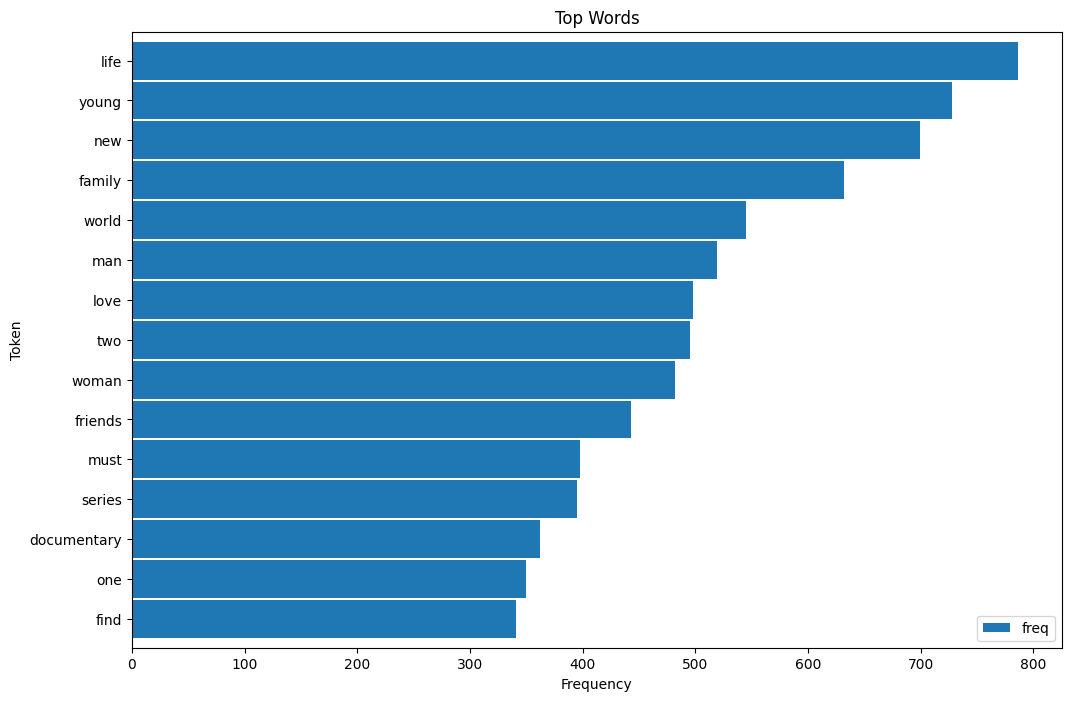

In [143]:
# Plotting the top 15 words by frequency
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# WordCloud Visualization

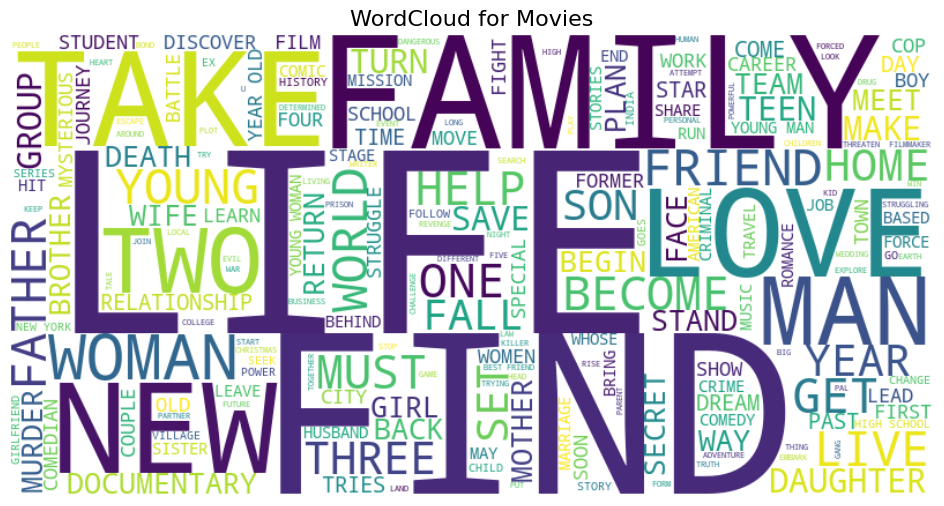

In [144]:
# Importing WordCloud and matplotlib for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting text for WordCloud for the type 'Movie'
text = " ".join(df[df['type'] == 'MOVIE']['description'])

# Generating WordCloud with improved settings
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white', colormap='viridis', stopwords=stop_words)  # Change stopwords to stop_words

# Generate the WordCloud
wordcloud.generate(text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud for Movies', fontsize=16)
plt.axis("off")
plt.show()


In [145]:
# The provided code conducts exploratory data analysis and text preprocessing on a Netflix dataset. It includes data visualization, text tokenization, and frequency analysis. Key actions involve creating descriptive statistics, plotting description length distribution, and generating word clouds. The code enhances understanding and prepares the data for further analysis.